In [ ]:
import zipfile
import os
import numpy as np  
zip_file_path = "D:/plant disease pridiction/archive (2).zip"
extract_dir = "D:/plant disease pridiction" 
if os.path.exists(zip_file_path):
    try:
        os.makedirs(extract_dir, exist_ok=True)


        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")


Successfully extracted 'D:/plant disease pridiction/archive (2).zip' to 'D:/plant disease pridiction'


In [3]:
!pip install opencv-python


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 6.7 MB/s eta 0:00:06
   - -------------------------------------- 1.8/39.5 MB 4.4 MB/s eta 0:00:09
   -- ------------------------------------- 2.6/39.5 MB 4.2 MB/s eta 0:00:09
   --- ------------------------------------ 3.7/39.5 MB 4.1 MB/s eta 0:00:09
   ---- ----------------------------------- 4.5/39.5 MB 4.1 MB/s eta 0:00:09
   ----- ---------------------------------- 5.2/39.5 MB 4.0 MB/s eta 0:00:09
   ------ --------------------------------- 6.0/39.5 MB 4.0 MB/s eta 0:00:09
   ------ --------------------------------- 6.8/39.5 MB 4.0 MB/s eta 0:00:09
   ------- -------------------------------- 7.9/39.5 MB 4.0 MB/s eta 0:00:08
   -------- ------------------------------- 8.7/39.5 MB 4.0 MB/s eta 0:00:08
   --------- ------------------------------ 9.4/39.5 MB 4.0 MB/s eta 0:00:08
   ---------- ----------------------------- 10.2/39.5 MB 4.0 MB/s eta 0:00:08
   --

In [9]:
!pip install tensorflow


  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/376.0 MB 6.7 MB/s eta 0:00:56
   ---------------------------------------- 1.8/376.0 MB 4.4 MB/s eta 0:01:26
   ---------------------------------------- 2.6/376.0 MB 4.1 MB/s eta 0:01:32
   ---------------------------------------- 3.4/376.0 MB 3.9 MB/s eta 0:01:35
   ---------------------------------------- 4.2/376.0 MB 3.9 MB/s eta 0:01:35
    --------------------------------------- 5.0/376.0 MB 3.8 MB/s eta 0:01:38
    --------------------------------------- 5.8/376.0 MB 3.7 MB/s eta 0:01:39
    --------------------------------------- 6.6/376.0 MB 3.7 MB/s eta 0:01:40
    --------------------------------------- 7.3/376.0 MB 3.7 MB/s eta 0:01:40
    ----

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import glob
import cv2
import tensorflow as tf

In [14]:
train='D:/plant disease pridiction/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

In [15]:
size=224

In [16]:
train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=90,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(train,
                      batch_size=164,
                      target_size=(size,size),
                      subset="training",
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=True)

Found 63282 images belonging to 38 classes.


In [17]:
train_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

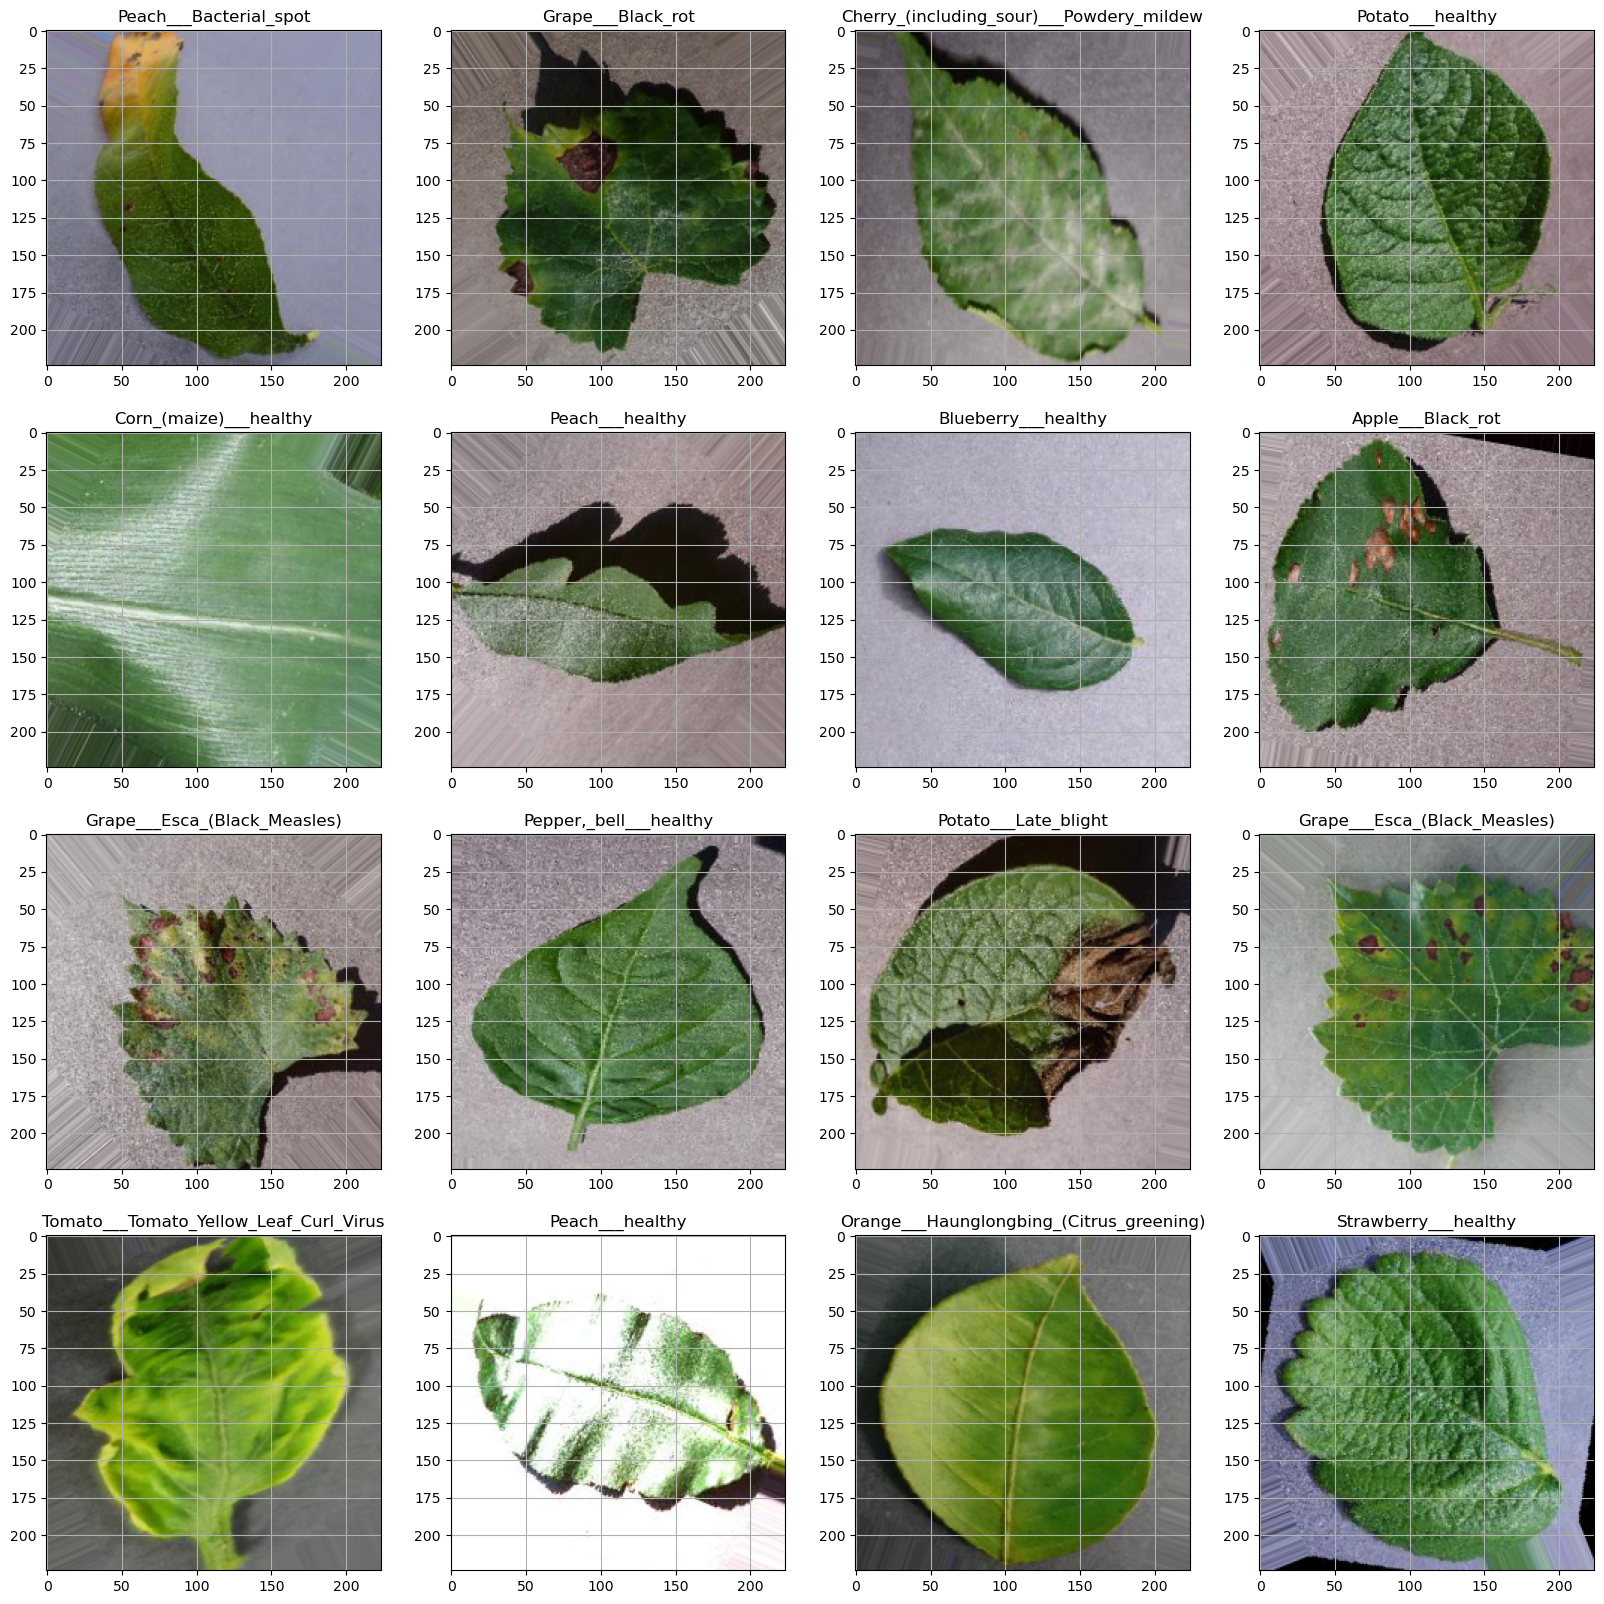

In [18]:
#let's display some images from training set

classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])   # when y is categorical
        # plt.title(classes[int(y_batch[i])])   # when y is binary or sparse
        plt.grid(None)
    # show the plot
    plt.show()
    break


In [19]:
valid='D:/plant disease pridiction/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [20]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
    validation_split=0.1,
).flow_from_directory(valid,
                      batch_size=164,
                      target_size=(224,224),
                      subset='validation',
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 1742 images belonging to 38 classes.


In [22]:
test='D:/plant disease pridiction/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [23]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [24]:
test_generator.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [25]:
from tensorflow import keras
model = keras.models.Sequential()  # To build NN

model.add(keras.layers.Conv2D(filters=32, kernel_size=7, strides=1,
                padding="same", activation="relu", name="Conv1", input_shape= (224,224,3)))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool1"))

model.add(keras.layers.Conv2D(filters=64, kernel_size=5, strides=1,
                              padding="same", activation="relu", name="Conv2"))
model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool2"))

model.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv3"))

model.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=1,
                              padding="same", activation="relu", name="Conv4"))

model.add(keras.layers.MaxPool2D(pool_size=2, name="Pool3"))

model.add(keras.layers.Flatten(name="Flatten1"))   #flatten layer - to convert into 1d vector

model.add(keras.layers.Dense(128, activation="relu", name="Dense1"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(64, activation="relu", name="Dense2"))  #hidden layer
tf.keras.layers.Dropout(0.5)

model.add(keras.layers.Dense(38, activation="softmax", name="Output"))  #output layer

# The model’s summary() method displays all the model’s layers
print(model.summary())

c:\Users\srinu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 224, 224, 32)   │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool1 (MaxPooling2D)            │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv2 (Conv2D)                  │ (None, 112, 112, 64)   │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool2 (MaxPooling2D)            │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv3 (Conv2D)                  │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv4 (Conv2D)                  │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Pool3 (MaxPooling2D)            │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten1 (Flatten)              │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense1 (Dense)                  │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,125,990 (99.66 MB)

 Trainable params: 26,125,990 (99.66 MB)

 Non-trainable params: 0 (0.00 B)

None
